### Homework

1. **Tokenization** 

Write a generic Python tokenizer, which takes a set of text lines and tabulates the different words (that is, the tokens will be simply English words), keeping track of the frequency of each word.  Use the guidance in the accompanying notebook, 'Homework_1.ipynb'.

### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [1]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('\ufeffThe', 1)
('Project', 79)
('Gutenberg', 22)
('eBook', 4)
('of', 4469)
('Life', 5)
('on', 856)
('the', 8443)
('Mississippi', 104)
('This', 127)
('ebook', 2)
('is', 1076)
('for', 1017)
('use', 34)
('anyone', 4)
('anywhere', 8)
('in', 2381)
('United', 36)
('States', 26)
('and', 5692)
('most', 119)
('other', 223)
('parts', 5)
('world', 40)
('at', 676)
('no', 325)
('cost', 18)
('with', 1053)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('You', 92)
('may', 85)
('copy', 12)
('it,', 199)
('give', 67)
('it', 1382)
('away', 107)
('or', 561)
('re-use', 2)
('under', 112)
('terms', 22)
('License', 8)
('included', 2)
('this', 591)
('online', 4)
('www.gutenberg.org.', 4)
('If', 85)
('you', 813)
('are', 361)
('not', 680)
('located', 9)
('States,', 8)
('will', 287)
('have', 557)
('to', 3518)
('check', 4)
('laws', 13)
('country', 50)
('where', 152)
('before', 150)
('using', 10)
('eBook.', 2)
('Title:', 1)
('Author:', 1)
('Mark', 2)
('Twain', 2)
('Release', 1)
('date:', 1)
('July', 7)
('1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.

Part 2: Add code to sort the contents of wdict by word occurrence frequency.  What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.

Write your modified code in the cell below.

In [3]:
import re
import string

# part 1: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.
wdict = {}

lookup_table = str.maketrans("", "", string.punctuation) # code adapted from https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string

with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1

    while line:
        # inserting code here
        # problem 2: There are punctuation marks, which we don't want to concern ourselves with;
        line = line.translate(lookup_table) # code adapted from https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
        # problem 1: There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);
        line = re.sub(r'[^\x00-\x7f]', r'', line) # using the regular expression in the instruction to remove the non-ASCII letters
        # problem 3: The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.
        line = line.lower()

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break

('the', 9255)
('project', 90)
('gutenberg', 87)
('ebook', 13)
('of', 4532)
('life', 89)
('on', 947)
('mississippi', 159)
('this', 781)
('is', 1148)
('for', 1095)
('use', 48)
('anyone', 5)
('anywhere', 18)
('in', 2593)
('united', 37)
('states', 54)
('and', 5892)
('most', 124)
('other', 270)
('parts', 9)
('world', 68)
('at', 750)
('no', 422)
('cost', 25)
('with', 1081)
('almost', 38)
('restrictions', 2)
('whatsoever', 2)
('you', 1033)
('may', 89)
('copy', 17)
('it', 2293)
('give', 81)
('away', 172)
('or', 581)
('reuse', 2)
('under', 119)
('terms', 26)
('license', 24)
('included', 3)
('online', 4)
('wwwgutenbergorg', 5)
('if', 381)
('are', 387)
('not', 722)
('located', 9)
('will', 301)
('have', 571)
('to', 3592)
('check', 4)
('laws', 17)
('country', 77)
('where', 174)
('before', 208)
('using', 11)
('title', 3)
('author', 3)
('mark', 24)
('twain', 26)
('release', 1)
('date', 18)
('july', 7)
('10', 10)
('2004', 1)
('245', 1)
('recently', 4)
('updated', 2)
('january', 3)
('1', 13)
('2021', 1

In [6]:
# part 2: 
import numpy as np

# Add code to sort the contents of wdict by word occurrence frequency.

# code adapted from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
wdict = {k: v for k, v in sorted(wdict.items(), key=lambda x: x[1], reverse=True)}

# What are the top 100 most frequent word tokens? 
print('top 100 word tokens were:', ' '.join(list(wdict.keys())[:100]))

# Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?
words = np.array(list(wdict.keys()))
word_frequencies = np.array(list(wdict.values()))
total_words = np.sum(word_frequencies)

sum_so_far = 0
for i, frequency in enumerate(word_frequencies):
    sum_so_far += frequency
    if sum_so_far > 0.9 * total_words:
        break
print()
print('the number of distinct words that make up the top 90% of word occurence was:', i)

top 100 word tokens were: the and of a to in it i was that he is for with you his had but on as this they at not all by one there were be my or from have out so up him we me when would which river an them no then said are if their now about time been down its could has will into what her two do other some man new any got these she who more water did before over way hundred upon here after day than well through get old every can boat went never good years see know

the number of distinct words that make up the top 90% of word occurence was: 3731


2. **Embedding**

Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

In [7]:
# following code is from the "Sequnetial_Data_Models.ipynb" (the main notebook for this week)

%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary

# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)

# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))

# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)


2024-04-09 03:44:08.509362: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The vocabulary size is:  30522
(30522, 1024)
4000
10000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 1.626s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.193s
[t-SNE] Iteration 50: error = 97.8535919, gradie

I first plotted the whole thing with out text to see if there is any interesting cluster to zoom in to:

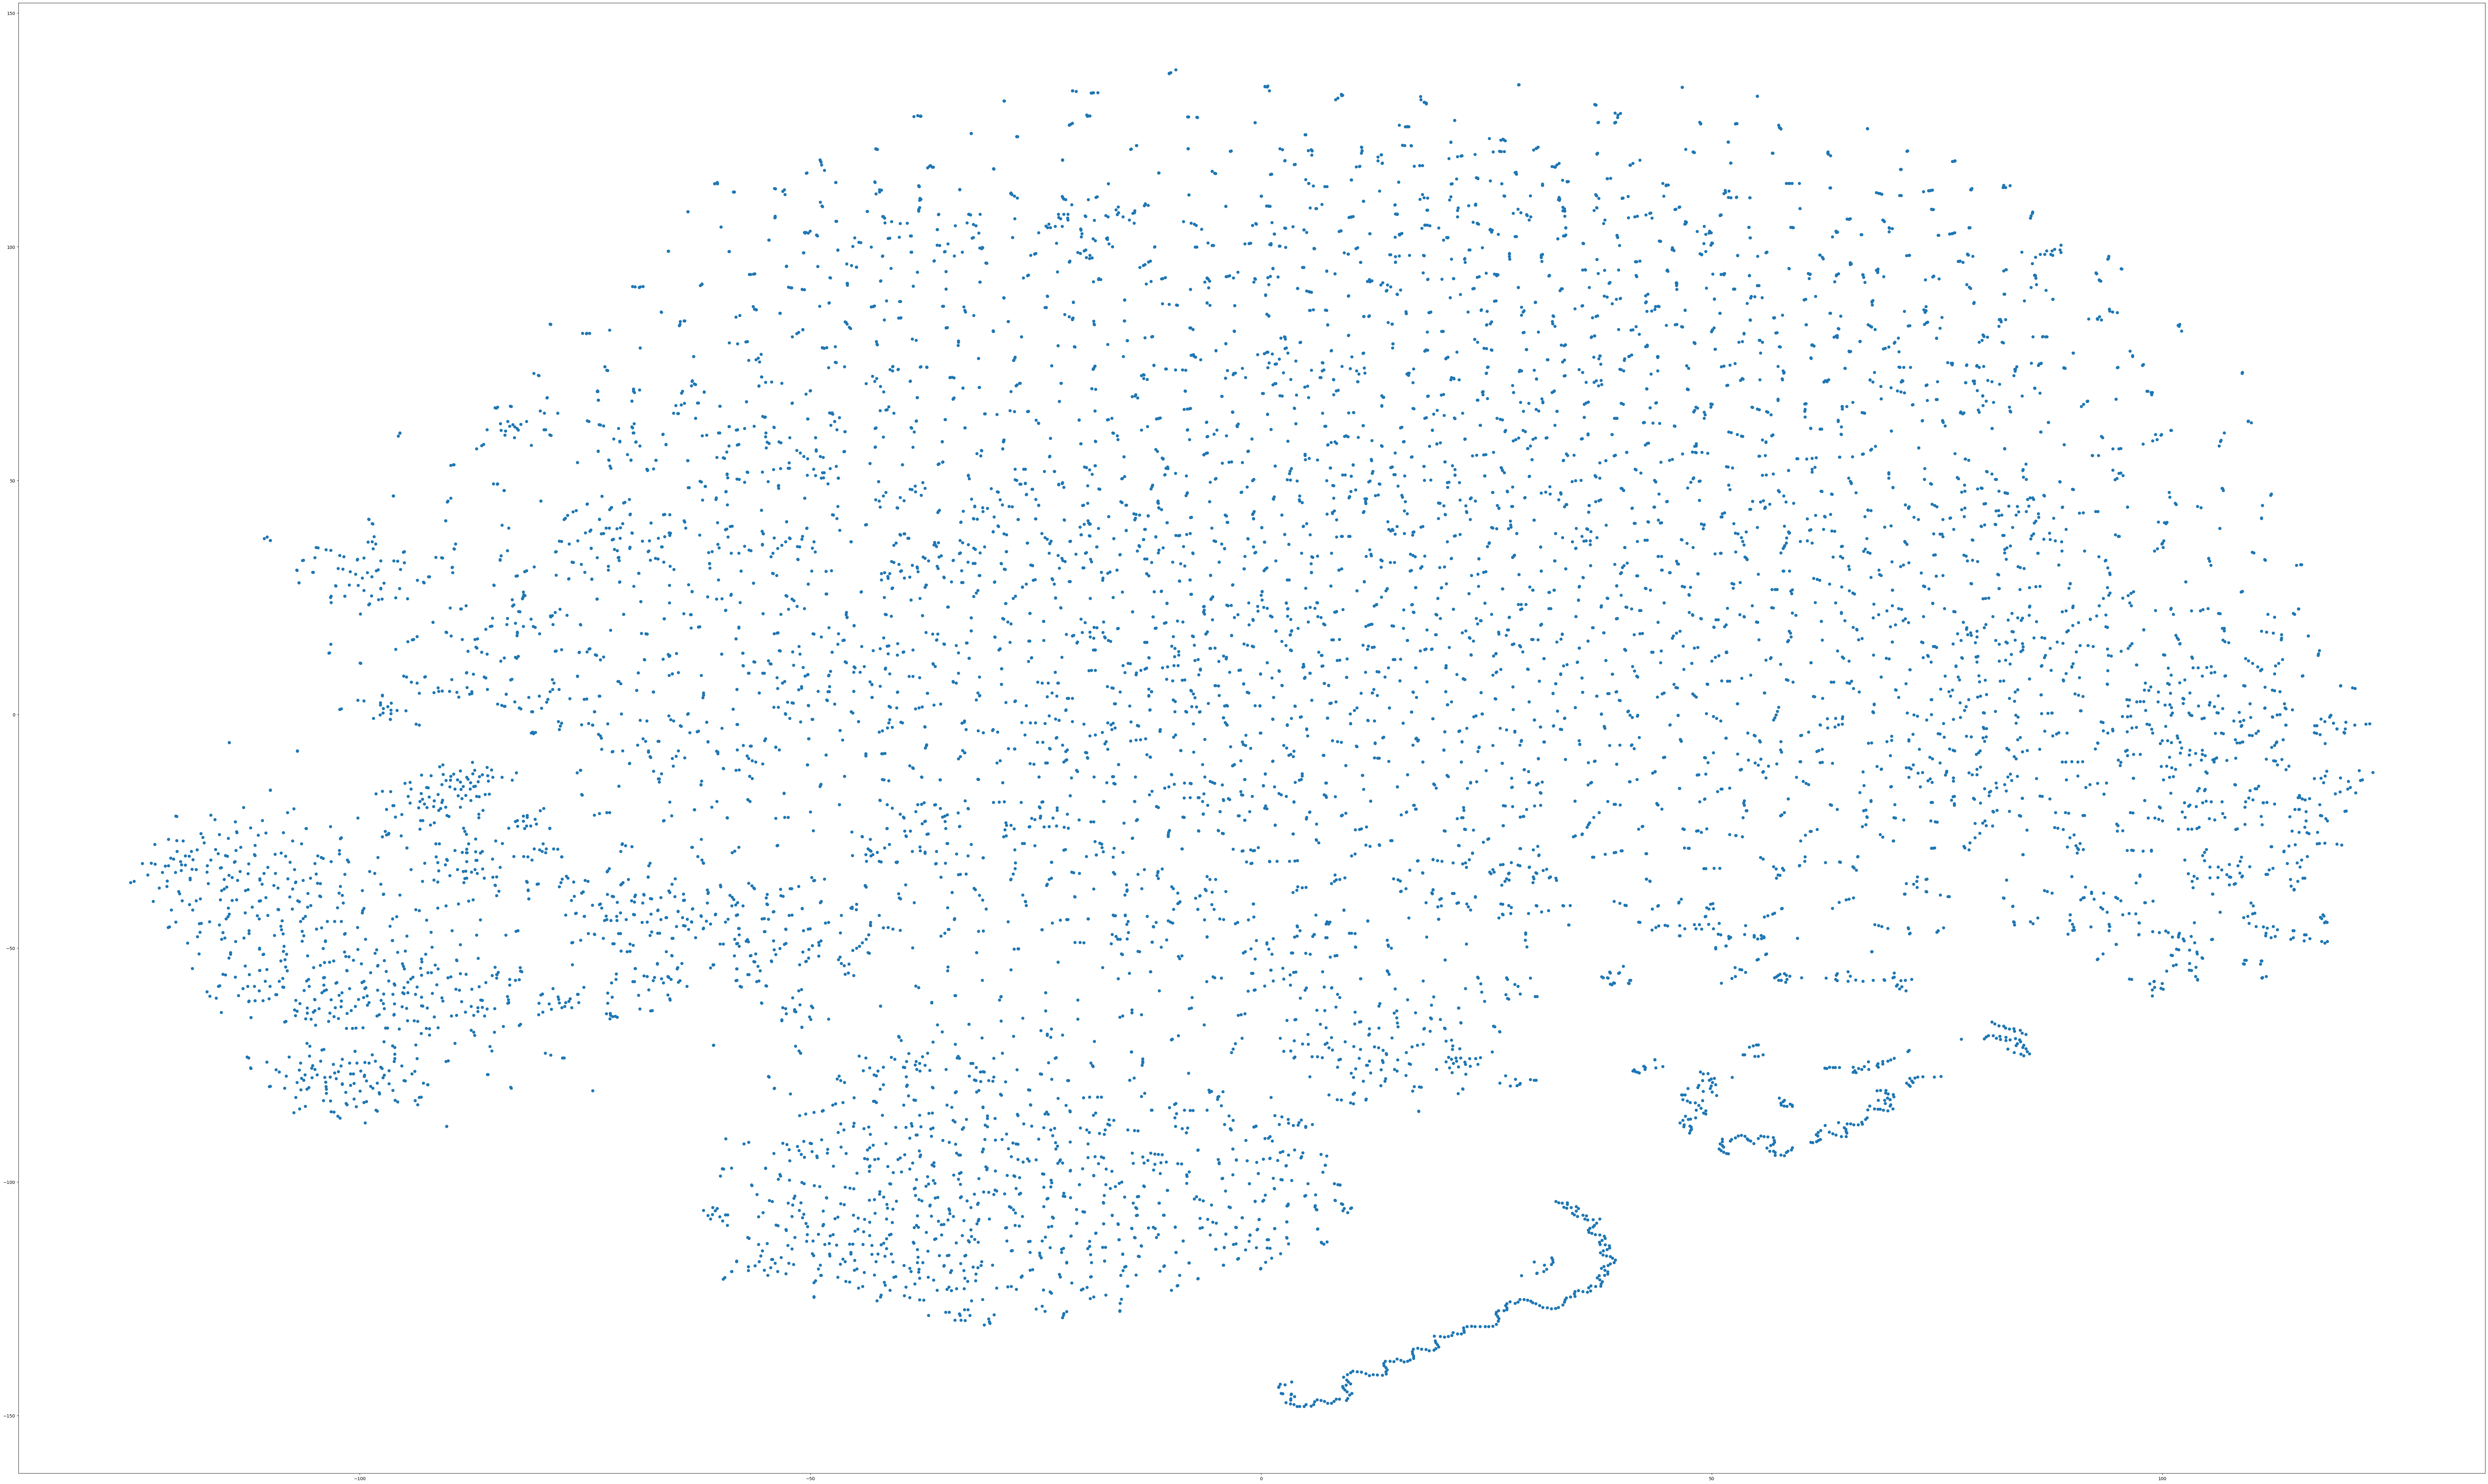

In [14]:
fig = plt.figure()
plt.scatter(bert_word_embs_to_use_tsne[:, 0], bert_word_embs_to_use_tsne[:, 1])
# alltexts = list()
# for i, txt in enumerate(bert_words_to_plot):
#     plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1])
    # currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    # alltexts.append(currtext)

plt.savefig('./all_words_scatter.png')
plt.show()

In [24]:
# really simple plotting function
def plot_box(x, y):
    fig = plt.figure(figsize=(10,10))
    for i, txt in enumerate(bert_words_to_plot):
        if bert_word_embs_to_use_tsne[i,0] > x[0] and bert_word_embs_to_use_tsne[i,0] < x[1] and bert_word_embs_to_use_tsne[i,1] > y[0] and bert_word_embs_to_use_tsne[i,1] < y[1]:
            plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
            plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    plt.show()

there seemed to be some interesting pattern in [0, 50] and [-150, -100], so let's zoom in there:


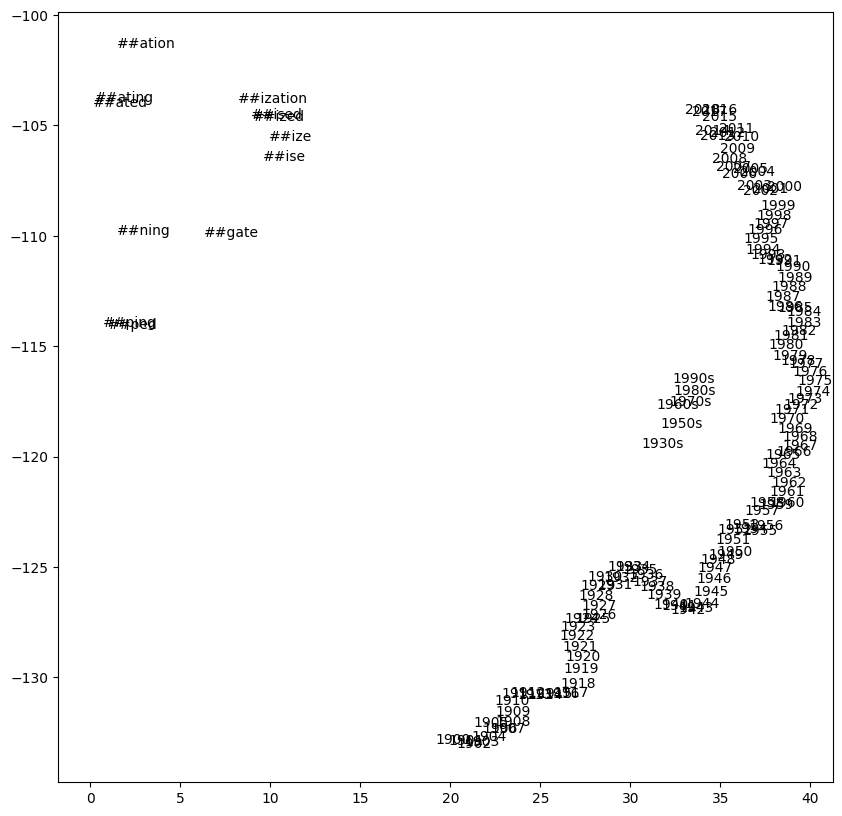

In [28]:
plot_box((0, 50), (-150, -100))

It looks like this was a cluster of years, from 1900 to maybe 2016!

I also zoomed into interesting shape on [25, 75] [-100, 70]:

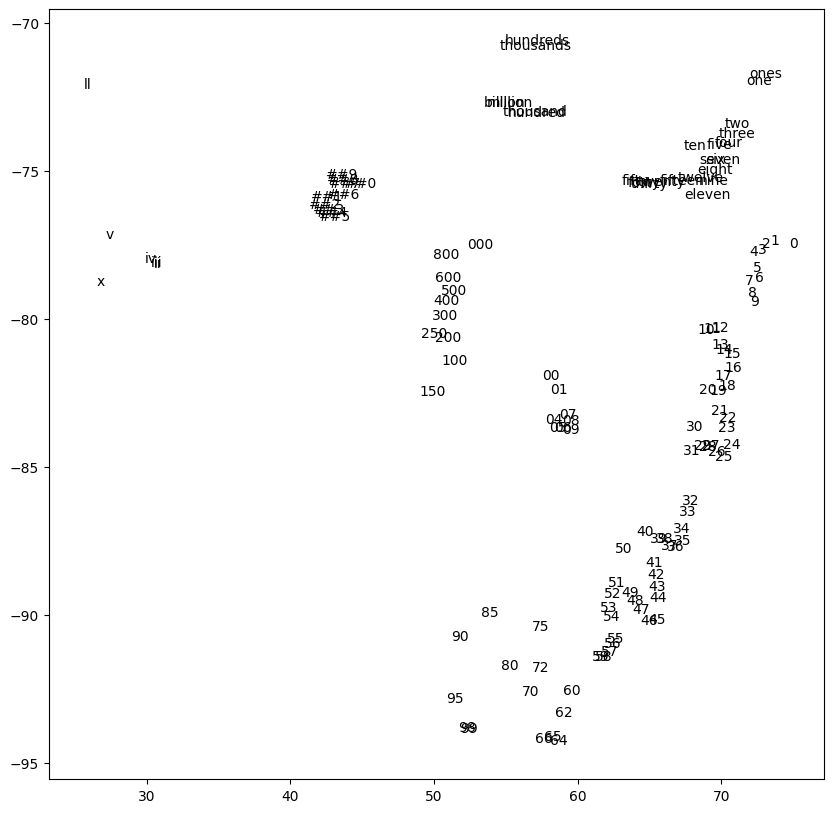

In [30]:
plot_box((25, 75), (-100, -70))

This looks like a cluster of numbers!

I also looked at two more random places after discovering the two above:

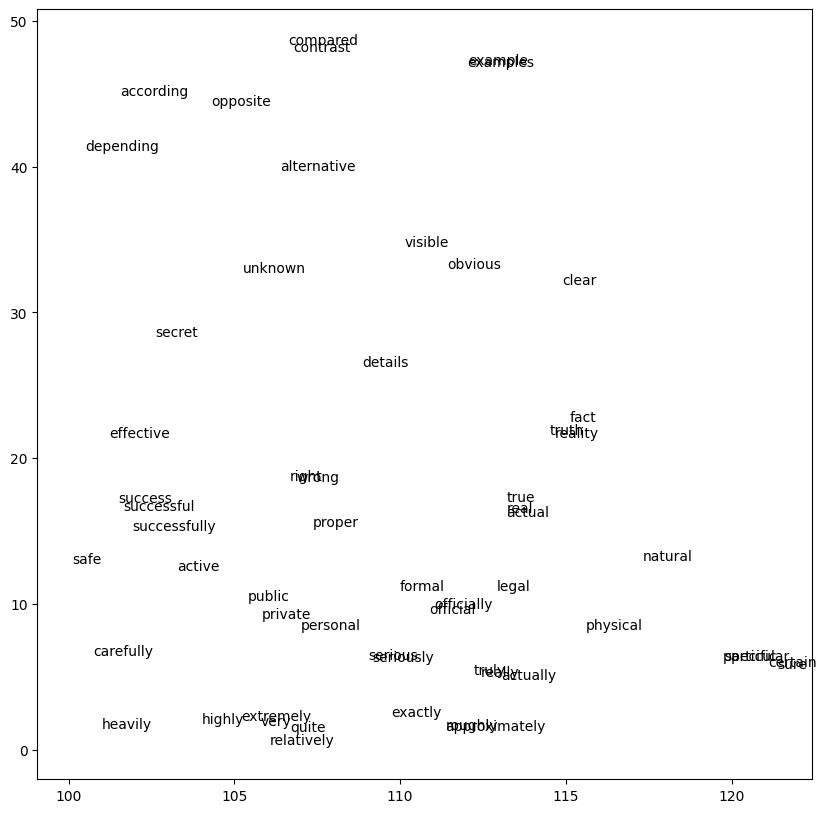

In [31]:
plot_box((100, 150), (0, 50))

I didn't really see a pattern here. Maybe something to do with adjectives?

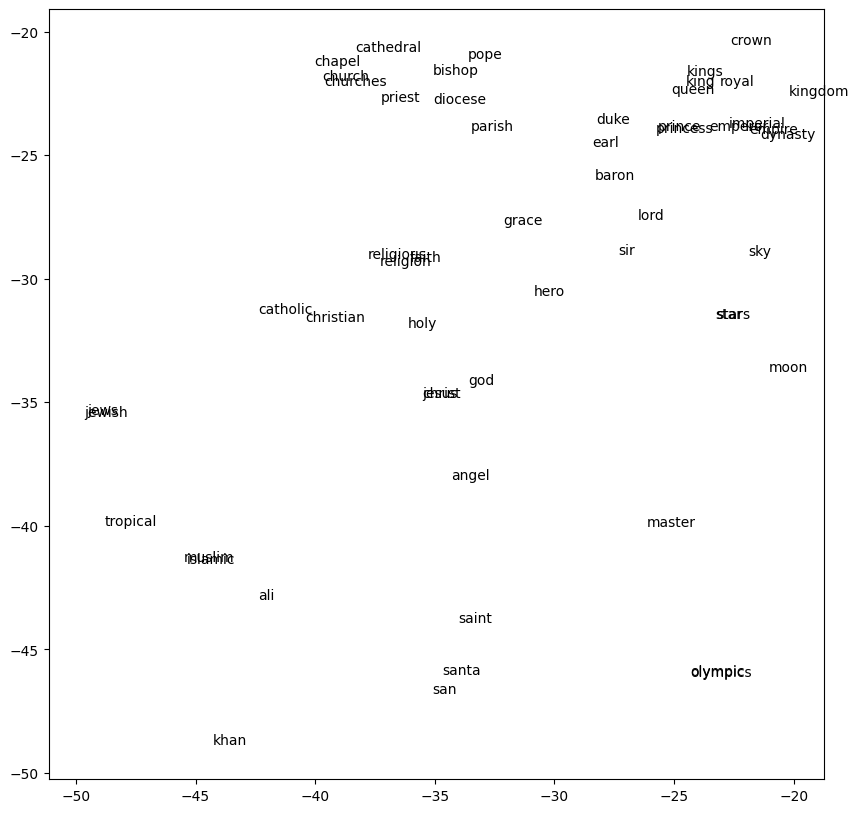

In [33]:
plot_box((-50, -20), (-50, -20))

This one looks like it is related to religion and medival things. 